<a href="https://colab.research.google.com/github/AhohPerisic/kmg/blob/main/Mnist%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 23102311 김민규

# Mnist

In [59]:
# 진행전 시드 값을 모두 고정하여 진행 하겠습니다!
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# MNIST 데이터셋 로드
mnist = fetch_openml('mnist_784')

# 데이터와 라벨 분리
X, y = mnist['data'], mnist['target']

# 훈련 세트와 테스트 세트로 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [55]:
# 랜덤 포레스트 분류기 모델 초기화 및 훈련
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [56]:
# 테스트 세트에 대한 예측
y_pred = rf_clf.predict(X_test)

In [62]:
# Confusion matrix 출력
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[1325    0    4    0    1    1    3    1    6    2]
 [   0 1573    6    8    2    0    0    6    3    2]
 [   4    5 1334    4    5    1    9    8    8    2]
 [   1    0   23 1366    0    9    0   14   12    8]
 [   4    1    3    0 1257    0    2    3    3   22]
 [   1    3    3   17    4 1226    8    1    8    2]
 [   4    1    0    0    6   10 1372    0    3    0]
 [   3    5   15    0    7    1    0 1455    2   15]
 [   1    6    9   15    6   11    5    7 1290    7]
 [   4    6    5   16   20    5    1   10    9 1344]]


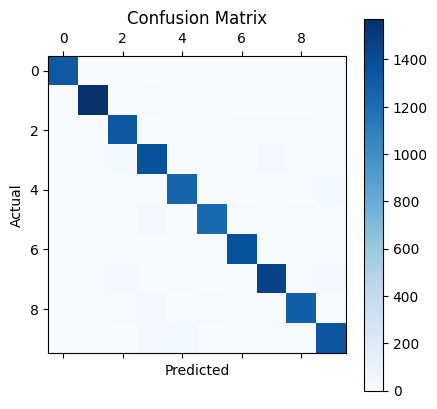

In [74]:
# Confusion matrix 시각화
plt.matshow(conf_matrix, cmap=plt.cm.Blues)
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Confusion matrix을 시각화 해보니 1과 7이 어두워 보입니다.
샘플 수를 확인하여 데이터가 불균형한지 보도록 하겠습니다.

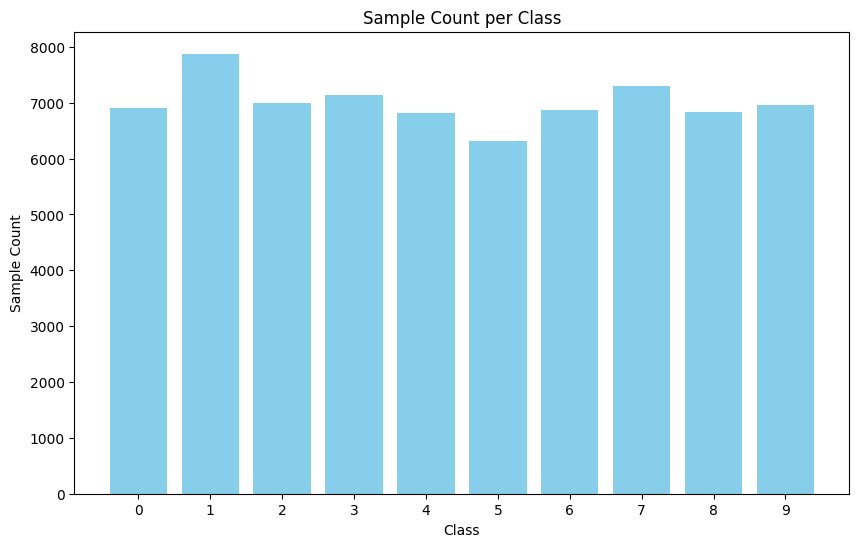

In [80]:
# 샘플 수 확인하기
plt.figure(figsize=(10, 6))
plt.bar(class_samples_count.keys(), class_samples_count.values(), color='skyblue')
plt.xlabel('Class')
plt.ylabel('Sample Count')
plt.title('Sample Count per Class')
plt.show()

샘플 수를 확인 해보니 Mnist는 데이터가 모두 고르게 분포 돼 있는것 같습니다.
그렇다면 precision 과 Recall, F1-score를 구하여 확인해보도록 하겠습니다.

In [81]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

# Precision 계산
precision = np.diag(conf_matrix) / np.sum(conf_matrix, axis=0)

# Recall 계산
recall = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)

# F1 점수 계산
f1_score = 2 * (precision * recall) / (precision + recall)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)


Precision: [0.98366741 0.983125   0.95149786 0.95792426 0.96100917 0.96993671
 0.98       0.96677741 0.95982143 0.95726496]
Recall: [0.98659717 0.983125   0.96666667 0.95324494 0.97065637 0.96307934
 0.98280802 0.96806387 0.95062638 0.94647887]
F1 Score: [0.98513011 0.983125   0.95902229 0.95557887 0.96580868 0.96649586
 0.981402   0.96742021 0.95520178 0.95184136]


모두 0.95 이상의 수치가 나왔습니다. 이로써 데이터가 고르게 분포 돼 있다는 것을 알 수 있습니다. 그렇다면 이제 정확도를 구해보도록 하겠습니다.

In [86]:
# 정확도 출력
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9672857142857143


정확도는 0.96이 나왔습니다.

결과를 간단하게 분석해보자면 우선 이 데이터는 0~9까지 multi-class이기 때문에 Multi-class classification인 랜덤 포레스트를 사용하였습니다. 이 모델의 사용 이유로는 Mnist의 데이터셋이 많이 존재한다는 것이며 여러 의사 결정 트리를 결정하고 앙상블을 생성해내는 모델이기 때문에 multiple data에 적합해 보여 사용하였습니다. 이러한 이유로 Random forest 모델을 사용하여 정확도 0.96, f1-score는 0.97이라는 성능이 나왔습니다.

# 데이터간 불균형이 있는 샘플을 검증하기





In [78]:
# 각 클래스별 샘플 수 계산
class_samples_count = {}
for label in np.unique(y):
    class_samples_count[label] = np.sum(y == label)

In [79]:
# 1. 샘플 수 확인하기
for label, count in class_samples_count.items():
    print(f"Class {label}: {count} samples")

Class 0: 6903 samples
Class 1: 7877 samples
Class 2: 6990 samples
Class 3: 7141 samples
Class 4: 6824 samples
Class 5: 6313 samples
Class 6: 6876 samples
Class 7: 7293 samples
Class 8: 6825 samples
Class 9: 6958 samples


위 1,2,3번을 보며 1과 7이 비교적 이미지가 적거나 분류기가 잘 분류하지 못한다고 추측햐였습니다.

로지스틱 회귀를 사용하여 전처리를 진행하고자 합니다.


In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# 클래스 레이블을 정수로 변환
y_train_int = y_train.astype(int)

# 클래스별 샘플 수 계산
class_counts = np.bincount(y_train_int)

# 클래스별 가중치 계산 (클래스 1과 7에 높은 가중치 부여)
class_weights = {1: class_counts.max() / class_counts[1],
                 7: class_counts.max() / class_counts[7]}

# 로지스틱 회귀 모델 생성 및 훈련 (가중치 부여)
logistic_model_weighted = LogisticRegression(class_weight=class_weights, random_state=42)
logistic_model_weighted.fit(X_train, y_train_int)

# 테스트 데이터에 대한 예측
y_pred_weighted = logistic_model_weighted.predict(X_test)

# 정확도 평가
accuracy_weighted = accuracy_score(y_test, y_pred_weighted)
print("로지스틱 회귀 (가중치 부여) 정확도:", accuracy_weighted)

로지스틱 회귀 (가중치 부여) 정확도: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
